In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#kenyan_tweets = pd.read_csv('/content/drive/My Drive/Copy of Kenyan_Tweets_User.csv', engine ='python')
Nigerian_Tweets = pd.read_csv('/content/drive/My Drive/Final Data/Full Data/Key Data/Nigerian_Tweets_User (1).csv', engine ='python')
# South_African_Tweets = pd.read_csv('/content/drive/My Drive/Final/Edited Data/Key Data /SouthAfricanTweets.csv', engine ='python')

#Kenyan_Users = pd.read_csv('/content/drive/My Drive/Copy of Kenyan_User_Categories.csv', engine ='python')
Nigerian_Users = pd.read_csv('/content/drive/My Drive/Final Data/Full Data/Key Data/nigerian_tweets_user_grouped.csv', engine ='python')
#South_African_Users = pd.read_csv('/content/drive/My Drive/Copy of South_African_User_Categories.csv', engine ='python')

## **Overall Sentiment Analysis**

In [ ]:
kenyan_tweets = pd.read_csv('/content/drive/My Drive/Copy of Kenyan_Tweets_User.csv')
kenyan_tweets.shape

FileNotFoundError: ignored

In [ ]:
class Automation:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self):
        print('Automation in Action...!!!')

    def clean_tweets(self, df, csvfile):
        # drop na in clean tweets column
        df = df[df['clean_text'] != df['clean_text'].isna()]
        # dropduplicates and drop duplicates in clean tweets
        df = df.drop_duplicates().drop_duplicates(subset='clean_text')
        # convert int column appropriately
        df = df[df['polarity'] != 'polarity']
        # convert the created_at column to a datetime object
        df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
        df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
        df = df[df['created_at'] >= '2019-01-01' ]
        # convert int column appropriately
        df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')
        df['subjectivity'] = pd.to_numeric(df['subjectivity'], errors='coerce')
        df['retweet_count'] = np.abs(pd.to_numeric(df['retweet_count'], errors='coerce'))
        df['favorite_count'] = np.abs(pd.to_numeric(df['favorite_count'], errors='coerce'))
        df.to_csv(csvfile, index=False)
        return df

    def time_trend(self, df, city):
        ax = df.groupby('created_at')[['retweet_count', 'favorite_count']].sum().plot(figsize=(10,8))
        plt.title(f'Trend of likes and retweets for {city}', size=20)
        plt.ylabel('Frequency', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

    def draw_wordcloud(self, tweets_series, country):
        # word cloud visualization
        allWords = ' '.join([twts for twts in tweets_series])
        wordCloud = WordCloud(width=500, height=300, random_state=21, max_words=150, mode='RGBA',
                              max_font_size=140, stopwords=['amp', 'https']).generate(allWords)
        plt.figure(figsize=(12, 9))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f'Most used words describing Food Quantity in {country}', size=20)
        plt.show()

In [ ]:
auto = Automation()

Automation in Action...!!!


In [ ]:
cleaned_kenyan_tweets = auto.clean_tweets(kenyan_tweets, 'cleaned_kenyan_tweets.csv')

cleaned_kenyan_tweets.shape

(527766, 17)

In [ ]:
cleaned_kenyan_tweets.columns

Index(['timestamp', 'created_at', 'source', 'original_text', 'clean_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'place_coord_boundaries'],
      dtype='object')

In [ ]:
food_keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']


In [ ]:
cleaned_kenyan_tweets['original_author'].value_counts()

News_Kenya         3200
carlottascorner    3187
monkey_viral       3185
DrumChronicles     3171
Nairohost          3146
                   ... 
ErickOngeri7          1
AugustineMasi17       1
kariukiwanji          1
KENKIRIMI16           1
aka_kenya_            1
Name: original_author, Length: 882, dtype: int64

In [ ]:
kenyan_food_tw = cleaned_kenyan_tweets[['created_at', 'clean_text', 'original_text', 'polarity', 'subjectivity', 'retweet_count',
                            'favorite_count', 'original_author']]

kenyan_food_tw.dropna(inplace=True)
kenyan_food_tw.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(527765, 8)

In [ ]:
food_kenya = kenyan_food_tw[kenyan_food_tw['clean_text'].str.lower().str.contains('|'.join(food_keywords))]
food_kenya.shape

(8477, 8)

In [ ]:
adv_keywords = ['promo', 'free', 'cheap']
food_ken_adv = food_kenya[food_kenya['clean_text'].str.lower().str.contains('|'.join(adv_keywords))]
food_ken_adv.shape

(250, 8)

In [ ]:
adv_tweets = food_ken_adv.index
food_kenya = food_kenya.drop(adv_tweets, axis=0)
food_kenya.shape

(8227, 8)

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [ ]:
food_kenya['analysis'] = food_kenya['polarity'].apply(get_analysis)

So the Sentiment Analysis

In [ ]:
food_kenya['created_at'] = pd.to_datetime(food_kenya['created_at'], errors='coerce')

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day')

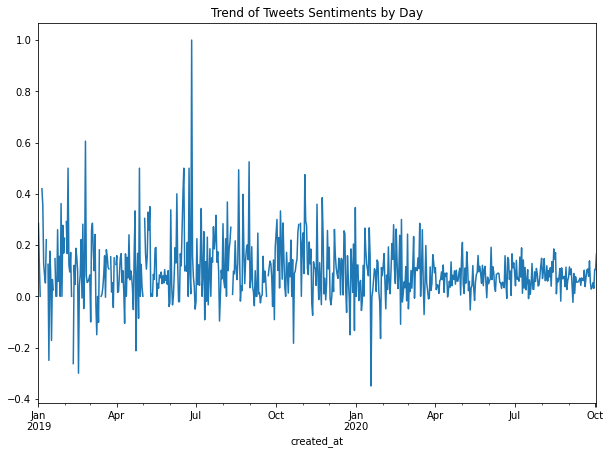

In [ ]:
by_day_sentiment = food_kenya.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

by_day_sentiment.head()
by_day_sentiment.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day')

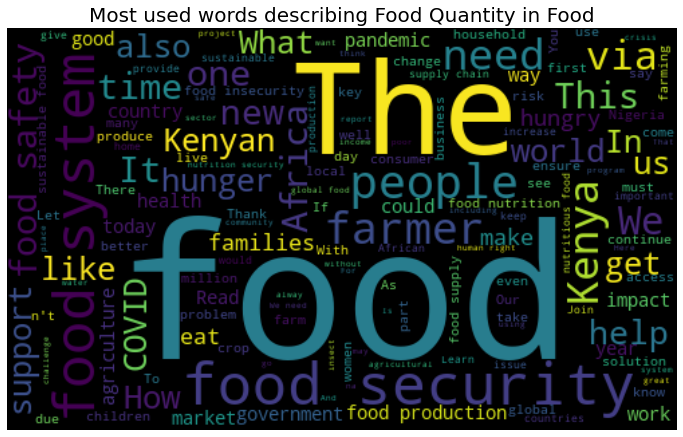

In [ ]:
auto.draw_wordcloud(food_kenya['clean_text'], 'Food')

In [ ]:
# by_month_sentiment = food_kenya.groupby([pd.Grouper(key='created_at', freq='D'), 'analysis']) \
#     .mean()['polarity'].unstack('analysis')

# by_month_sentiment.head()

In [ ]:
# plt.figure()
# by_month_sentiment.plot(figsize=(10, 7))

In [ ]:
# # Plotting 
# plt.figure(figsize=(10,7)) 
# for i in range(0, food_aa.shape[0]):
#     plt.scatter(food_aa["polarity"], food_aa["subjectivity"], color='b') 
# plt.title('Sentiment Analysis', size=22, color='purple') 
# plt.xlabel('Polarity', fontsize=14) 
# plt.ylabel('Subjectivity', fontsize=14) 
# plt.show()

In [ ]:
food_kenya['id'] = food_kenya.index.values

In [ ]:
df2 = food_kenya.groupby('original_author').agg({'id':'count', 'retweet_count':'sum', 'favorite_count':'sum'})

In [ ]:
most_id = df2.sort_values(by='id', ascending=False).head(20)
most_id

,id,retweet_count,favorite_count
original_author,,,
CovidFoodFuture,952,5245,7085
FSI_UF_IFAS,722,289,687
routetofood,514,2574,4776
CatholicRelief,265,1266,3713
CGSpaceResearch,183,6,13
socaakenya,176,412,621
MariaGernert,170,268,551
IFOAMorganic,160,922,1796
AfricaSustain1,128,269,381


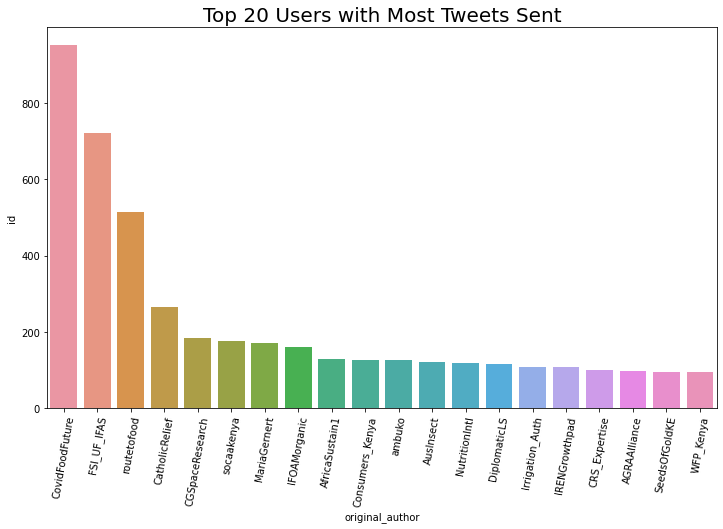

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.barplot(x=most_id.index, y= most_id['id'])
plt.xticks(rotation=80)
plt.title('Top 20 Users with Most Tweets Sent', size=20)
plt.show()

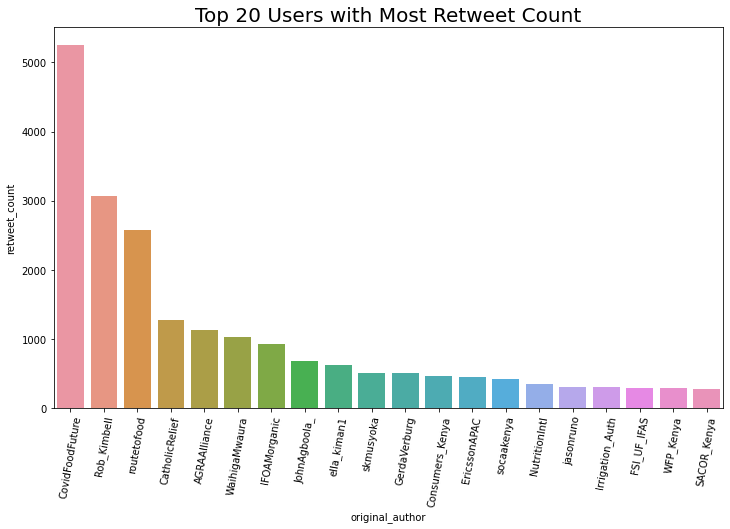

In [ ]:
most_rt = df2.sort_values(by='retweet_count', ascending=False).head(20)

plt.figure(figsize=(12, 7))
sns.barplot(x=most_rt.index, y= most_rt['retweet_count'])
plt.xticks(rotation=80)
plt.title('Top 20 Users with Most Retweet Count', size=20)
plt.show()

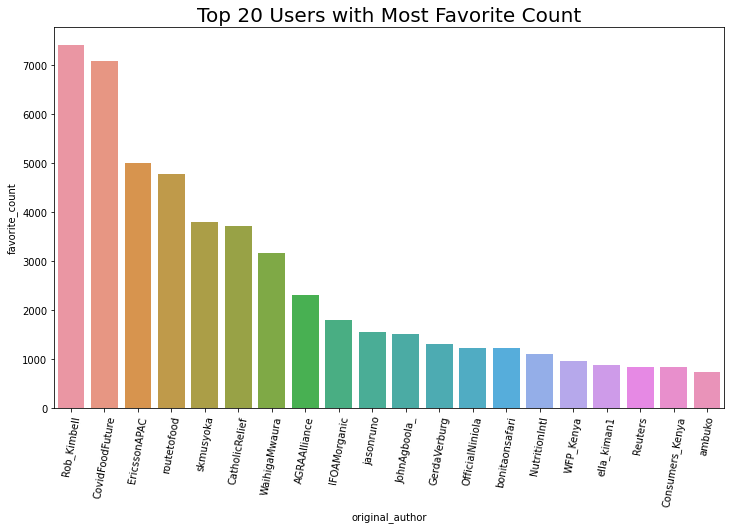

In [ ]:
most_rt = df2.sort_values(by='favorite_count', ascending=False).head(20)

plt.figure(figsize=(12, 7))
sns.barplot(x=most_rt.index, y= most_rt['favorite_count'])
plt.xticks(rotation=80)
plt.title('Top 20 Users with Most Favorite Count', size=20)
plt.show()

HASHTAGS ANALYSIS

In [ ]:
food_kenya.columns

Index(['created_at', 'clean_text', 'original_text', 'polarity', 'subjectivity',
       'retweet_count', 'favorite_count', 'original_author', 'analysis', 'id'],
      dtype='object')

In [ ]:
import re
from collections import Counter
def extract(text):
    matchs = re.findall('#\w+', text, flags=re.IGNORECASE)
    return [match.lower() for match in matchs]

def extract_tags(df):
    out_put = df.original_text.apply(extract).values

    final = []

    for out in out_put:
        for hashtag in out:
            final.append(hashtag)

    return pd.Series(final)
food_kenya['hashtags'] = extract_tags(food_kenya)

In [ ]:
food_kenya['hashtags'].value_counts().head(10)

#covid19foodfuture     7
#kenya                 4
#covid19               4
#worldfoodsafetyday    2
#cultivatinghope       1
#covidfoodfuture       1
#nutrition             1
#goforthegoals         1
#dog_food              1
#investments           1
Name: hashtags, dtype: int64

Text(0.5, 1.0, 'Top 10 Hashtags Used to describe Food')

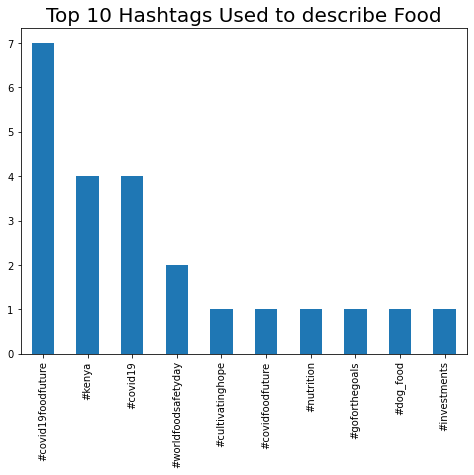

In [ ]:
food_kenya['hashtags'].value_counts().head(10).plot(kind='bar', figsize=(8, 6))
plt.title('Top 10 Hashtags Used to describe Food', size=20)

OKAY Let implement the ART of Sentiment Now 

i will try the transformer and transfer learning

In [ ]:
!pip install transformers==3.1.0

     |████████████████████████████████| 890kB 4.5MB/s 
     |████████████████████████████████| 3.0MB 24.3MB/s 
     |████████████████████████████████| 890kB 41.1MB/s 
     |████████████████████████████████| 1.1MB 47.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5e7da3588a6bee7bcf656f2efaf073a44d1fc50e3a8bfa107facc498c2c8ea6b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
candidate_labels = ["positive", "negative", 'neutral']
results = []
for i in food_kenya['clean_text'][:2500].values:
  sequence = i
  result = classifier(sequence, candidate_labels)
  results.append(result)

In [ ]:
# results

[{'labels': ['negative', 'positive', 'neutral'],
  'scores': [0.3688996136188507, 0.34698471426963806, 0.2841157019138336],
  'sequence': 'Whats Difference Between Vanilla Extract Imitation Vanilla Vanilla Bean Paste Food amp Wine'},
 {'labels': ['negative', 'positive', 'neutral'],
  'scores': [0.4651179313659668, 0.32825225591659546, 0.20662979781627655],
  'sequence': 'Retrospective Deliveroo Plans Make Its Own Food Replace Chefs Riders With Robots Eater London'},
 {'labels': ['positive', 'neutral', 'negative'],
  'scores': [0.8892661929130554, 0.07725165039300919, 0.03348216786980629],
  'sequence': 'Umar ibn Khattab reported Allahs Messenger said If trust Allah observing true trust Him indeed He give provision He provides birds emerge hungry morning return full belly evening'},
 {'labels': ['negative', 'neutral', 'positive'],
  'scores': [0.9616018533706665, 0.021146418526768684, 0.017251761630177498],
  'sequence': 'Kenya Somalia Ethiopia highest concern FAO indicating upto milion

In [ ]:
labels, scores = [], []
for i in results:
  labels.append(i['labels'][0])
  scores.append(i['scores'][0])

In [ ]:
food_kenya['sentiment_scores'] = 0
food_kenya['sentiment_class'] = 0

food_kenya['sentiment_scores'][:500] = scores
food_kenya['sentiment_class'][:500] = labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
neg = food_kenya[food_kenya['sentiment_class'] == 'negative']['sentiment_scores']
food_kenya.loc[food_kenya.sentiment_class == 'negative', 'sentiment_scores'] = -neg

In [ ]:
food_kenya['sentiment_class'].value_counts()

0           7727
positive     325
negative     170
neutral        5
Name: sentiment_class, dtype: int64

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


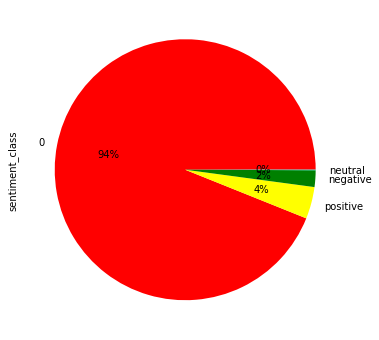

In [ ]:
food_kenya.sentiment_class.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green",'cyan'])

From the chart Above, the 0th class is the unclassified tweets, so we would use the ML approach to do that, in the future we can expand our horizon for the training data, but let stick with what we have now.

In [ ]:
features = food_kenya['clean_text'][:500].values
labels = food_kenya['sentiment_class'][:500].values

In [ ]:
processed_features = []
import re

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
def process_text(text):
  processed_features = []
  import re

  for sentence in range(0, len(text)):
      # Remove all the special characters
      processed_feature = re.sub(r'\W', ' ', str(text[sentence]))

      # remove all single characters
      processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

      # Remove single characters from the start
      processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

      # Substituting multiple spaces with single space
      processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

      # Removing prefixed 'b'
      processed_feature = re.sub(r'^b\s+', '', processed_feature)

      # Converting to Lowercase
      processed_feature = processed_feature.lower()

      processed_features.append(processed_feature)
  return processed_features

In [ ]:
def predict_sentiment_class(model, transformer, text):
  text = process_text(text)
  text = transformer.transform(text)
  prediction = model.predict(text)
  pred_proba = model.predict_proba(text)

  return prediction, pred_proba

In [ ]:
tt = process_text(food_kenya['clean_text'][:500].values)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = CountVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

text_classifier = GradientBoostingClassifier(n_estimators=300, random_state=2020)
text_classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2020, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[17  1 17]
 [ 0  0  0]
 [17  0 48]]
              precision    recall  f1-score   support

    negative       0.50      0.49      0.49        35
     neutral       0.00      0.00      0.00         0
    positive       0.74      0.74      0.74        65

    accuracy                           0.65       100
   macro avg       0.41      0.41      0.41       100
weighted avg       0.66      0.65      0.65       100

0.65


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred, proba = predict_sentiment_class(text_classifier, vectorizer, food_kenya['clean_text'][500:600].values)

In [ ]:
pred

array(['negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positi

In [ ]:
proba[:,1]

array([1.27558625e-03, 3.21713503e-02, 2.74165926e-02, 4.85397724e-04,
       1.19004869e-02, 3.66857688e-02, 1.19032793e-02, 3.66857688e-02,
       1.85431363e-02, 8.05188192e-03, 7.83104899e-04, 7.20109542e-03,
       2.59244342e-02, 7.33050287e-04, 2.16108823e-03, 2.95661288e-04,
       3.66857688e-02, 3.66857688e-02, 3.66857688e-02, 1.06731110e-02,
       5.57151861e-04, 3.73355111e-04, 1.41241684e-04, 2.15566015e-02,
       1.49674116e-02, 5.68749483e-05, 2.75932151e-04, 3.66857688e-02,
       3.76456429e-03, 3.66857688e-02, 2.13610865e-02, 1.27558625e-03,
       1.27558625e-03, 3.42684173e-03, 3.66857688e-02, 1.27914502e-02,
       1.14528133e-03, 3.66857688e-02, 1.11286955e-03, 3.66857688e-02,
       1.05837827e-04, 1.36542881e-04, 3.53282763e-03, 3.15373595e-04,
       3.66857688e-02, 3.65089346e-03, 1.10593025e-02, 7.29403223e-03,
       5.20494007e-03, 7.05264198e-04, 3.66857688e-02, 1.23238334e-02,
       4.70843848e-04, 3.58708304e-02, 3.66857688e-02, 3.66857688e-02,
      

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day')

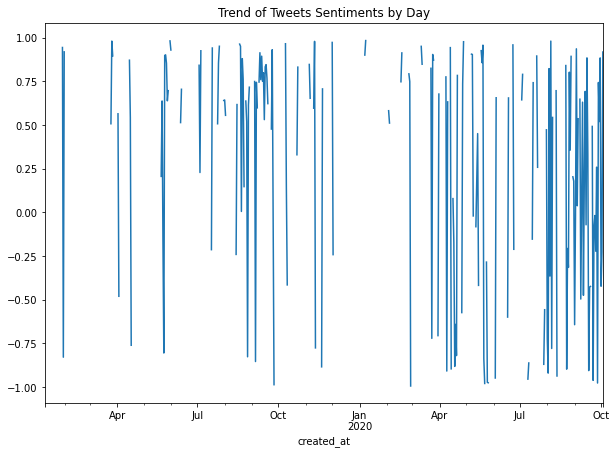

In [ ]:
by_day_sentiment = food_kenya[:500].groupby([pd.Grouper(key='created_at', freq='D')]).mean()['sentiment_scores']

# by_day_sentiment.head()
by_day_sentiment.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day')

## **Overall Change Point Sentiment Analysis**

In [ ]:
Kenyan_Food_Tweets
Nigerian_Food_Tweets
South_African_Food_Tweets

### **Let us first take note of the trend before Covid in Kenya**

We forecast the trend using Autoregressive Integrated Moving Average

In [ ]:
Pre_Covid_Kenyan_Food_Tweets_Trend = Kenyan_Food_Tweets[Kenyan_Food_Tweets['created_at'] <= '2020-03-12' ]
Pre_Covid_Kenyan_Food_Tweets_Trend = Pre_Covid_Kenyan_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Pre_Covid_Sentiment_Kenyan_Food_Tweets_Trend = Pre_Covid_Kenyan_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

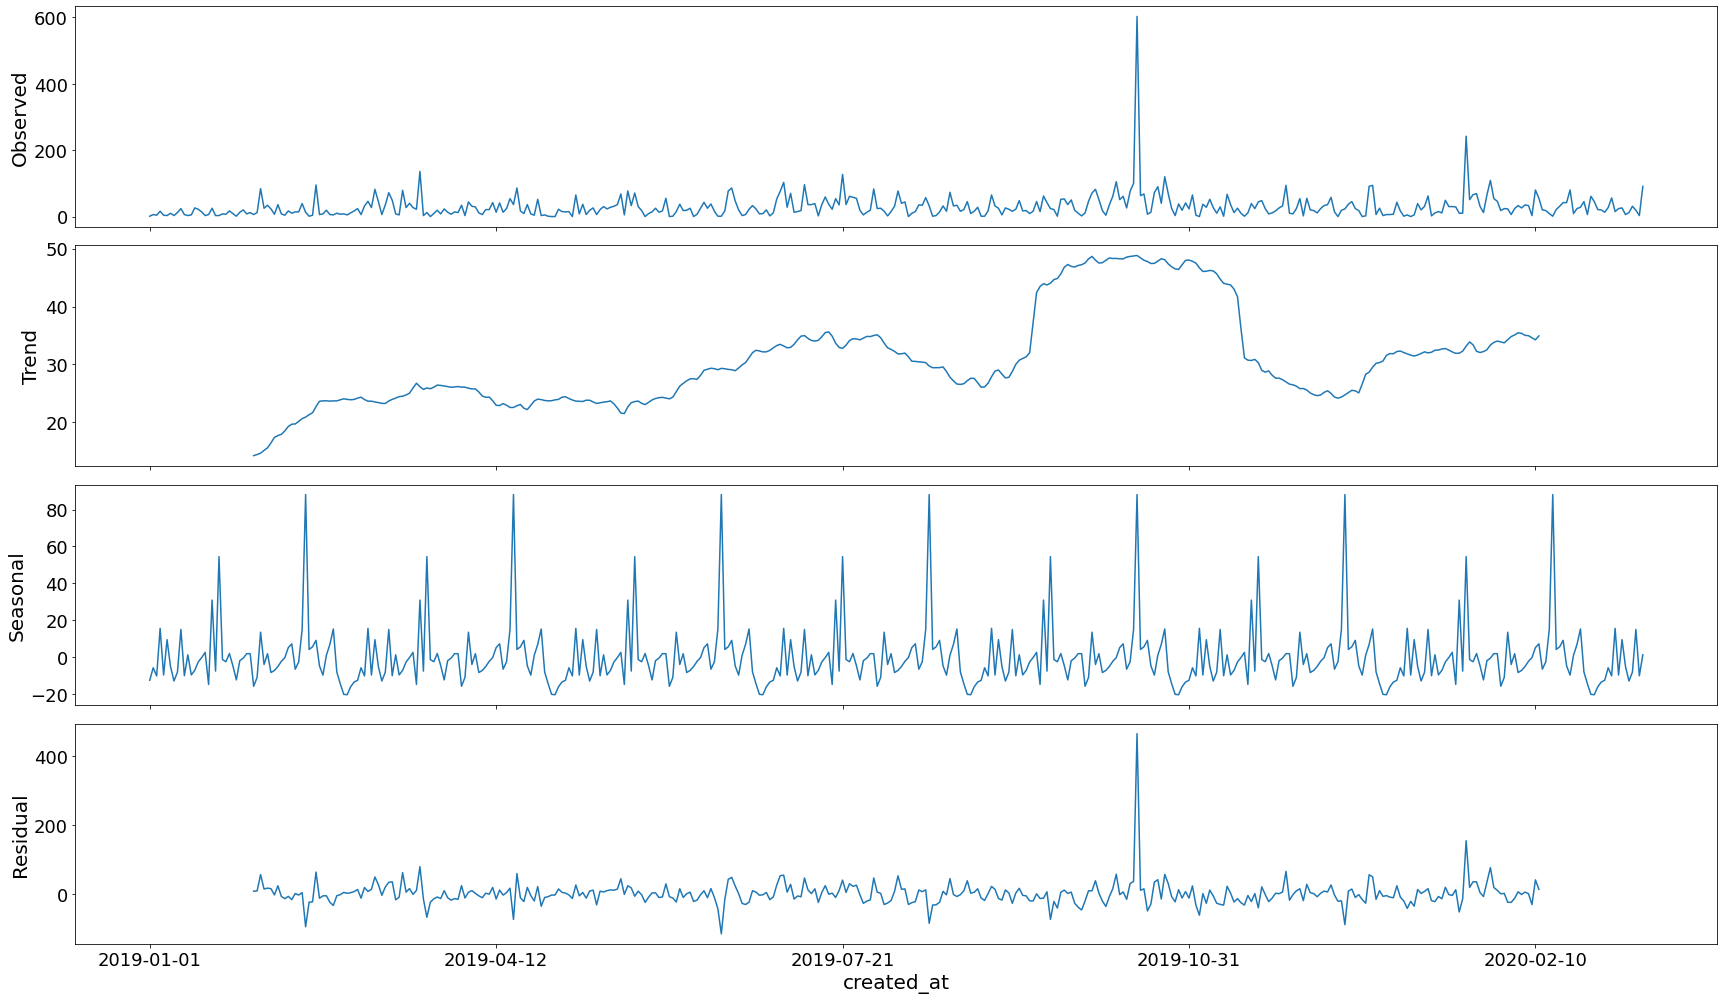

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Pre_Covid_Sentiment_Kenyan_Food_Tweets_Trend, model='additive', freq = 60)
fig = decomposition.plot()
plt.show()

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_Kenyan_Food_Tweets_Trend,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4571.645285580174
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4402.13018322828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4521.01348332057
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4176.621644180586
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4389.398892810106
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4294.29191643752
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4333.077464031304
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4178.352614732525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4491.730794823886
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4351.873747316782
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4503.864731558908
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4156.453837769603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4359.541733280456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4275.197228781876
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4317.207494341594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4158.3210331415885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4566.299118128486
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4451.912289907782
ARIMA(0, 1, 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_Kenyan_Food_Tweets_Trend,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2287      0.038      6.043      0.000       0.155       0.303
ma.L1         -1.0000     12.037     -0.083      0.934     -24.591      22.591
ar.S.L12      -0.4552      0.013    -36.410      0.000      -0.480      -0.431
sigma2      2264.6823   2.73e+04      0.083      0.934   -5.12e+04    5.57e+04


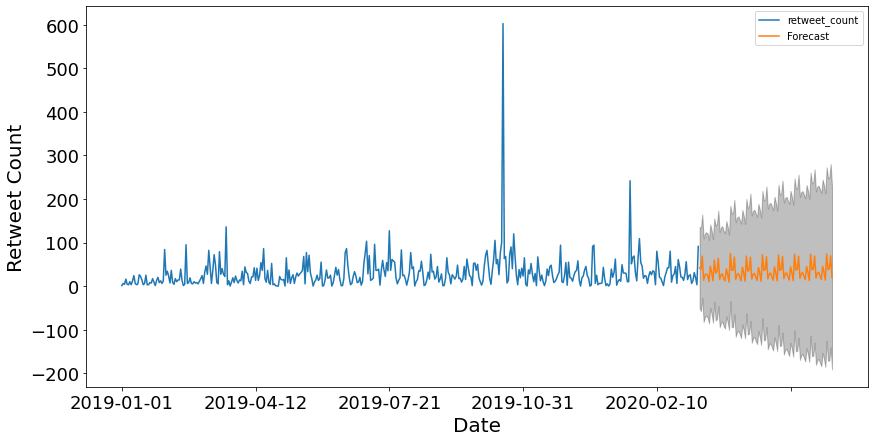

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Pre_Covid_Sentiment_Kenyan_Food_Tweets_Trend.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Retweet Count')

plt.legend()
plt.show()

## **What happened?**

In [ ]:
Covid_Kenyan_Food_Tweets_Trend = Kenyan_Food_Tweets[Kenyan_Food_Tweets['created_at'] <= '2020-03-12' ]
Covid_Kenyan_Food_Tweets_Trend = Covid_Kenyan_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Covid_Sentiment_Kenyan_Food_Tweets_Trend = Covid_Kenyan_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

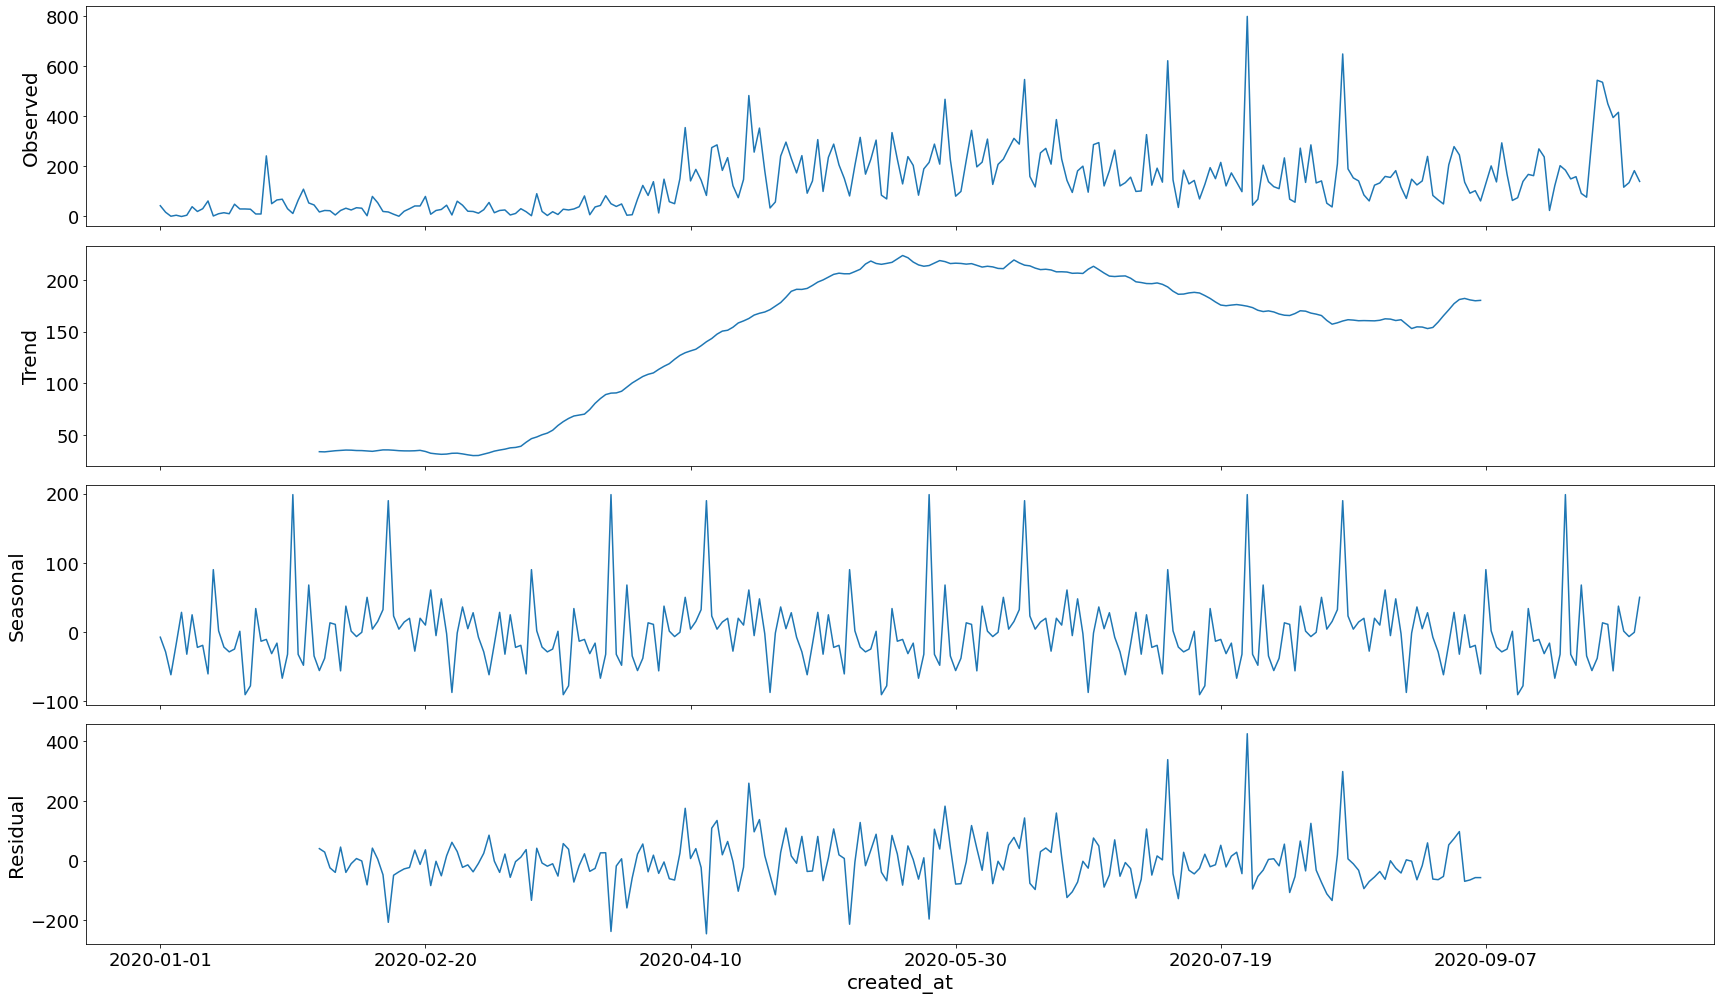

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Covid_Sentiment_Kenyan_Food_Tweets_Trend, model='additive',freq = 60)
fig = decomposition.plot()
plt.show()

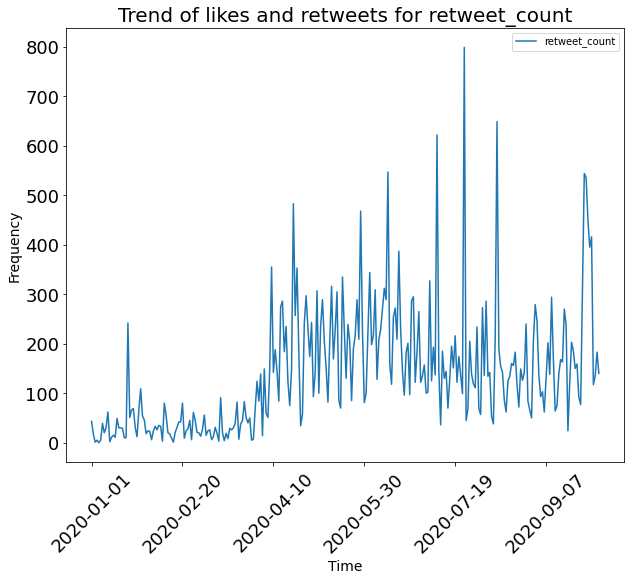

In [ ]:
Auto.Time_Trend(Covid_Sentiment_Kenyan_Food_Tweets_Trend, 'retweet_count')

### **Let us first take note of the trend before Covid in Nigeria**

We forecast the trend using Autoregressive Integrated Moving Average

In [ ]:
Pre_Covid_Nigerian_Food_Tweets_Trend = Nigerian_Food_Tweets[Nigerian_Food_Tweets['created_at'] <= '2020-03-12' ]
Pre_Covid_Nigerian_Food_Tweets_Trend = Pre_Covid_Nigerian_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Pre_Covid_Sentiment_Nigerian_Food_Tweets_Trend = Pre_Covid_Nigerian_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

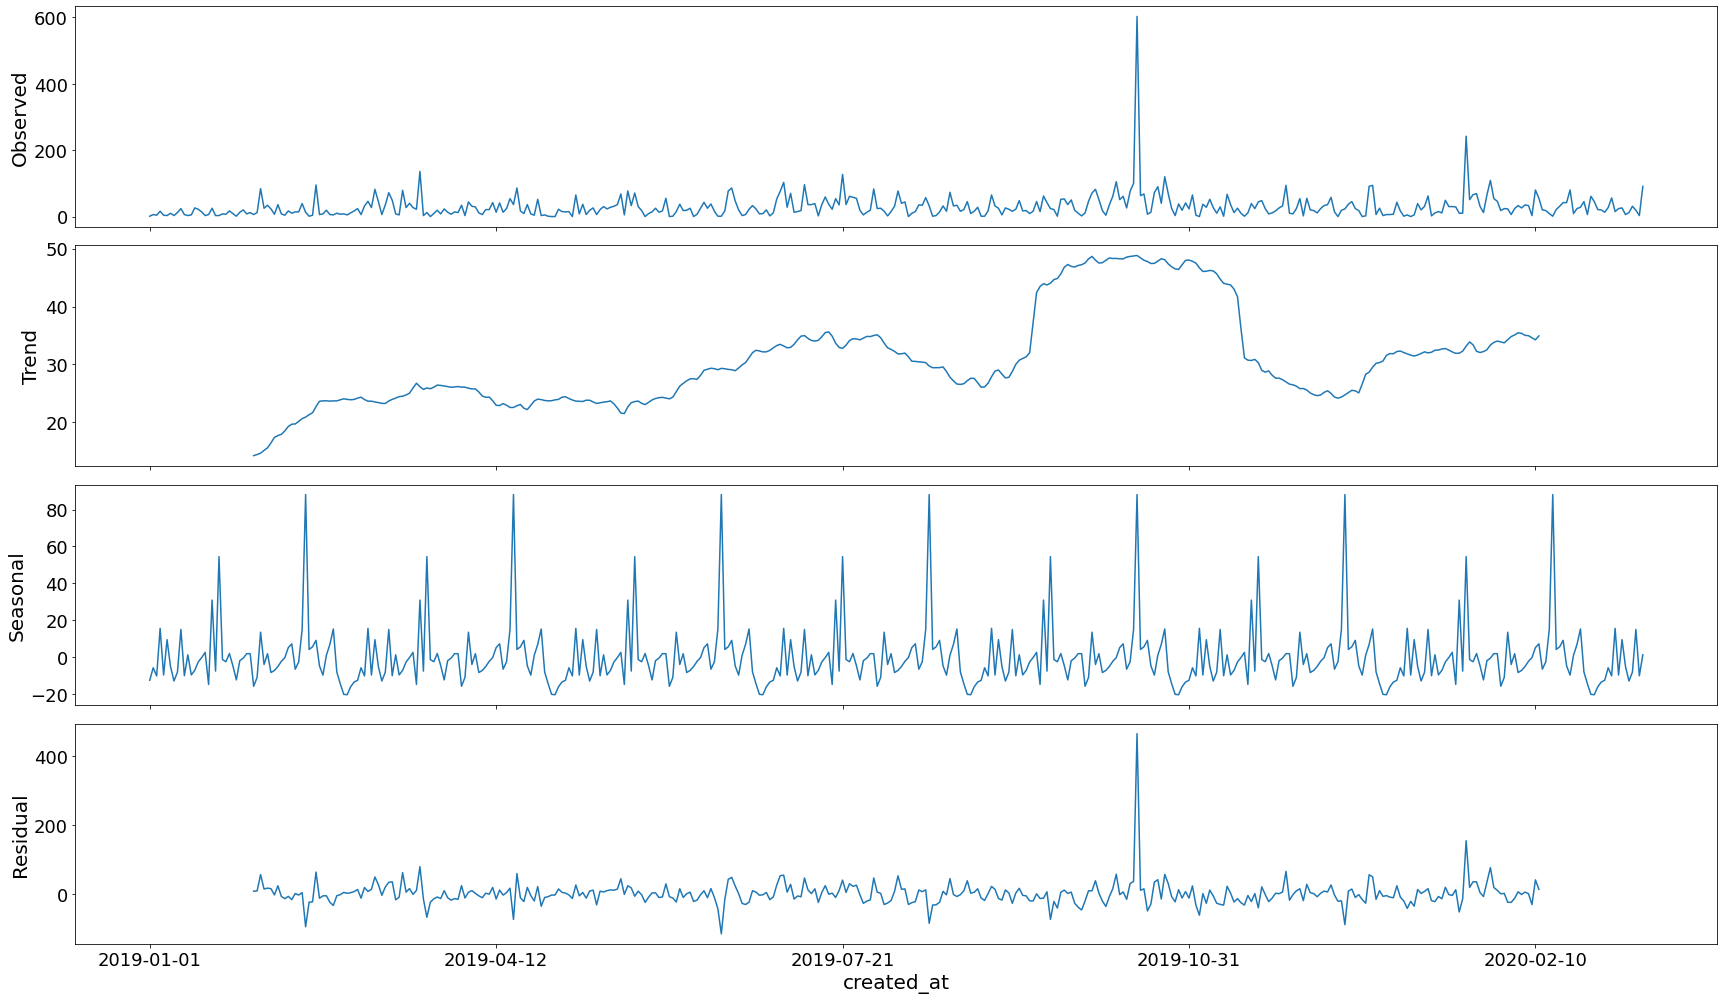

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Pre_Covid_Sentiment_Nigerian_Food_Tweets_Trend, model='additive', freq = 60)
fig = decomposition.plot()
plt.show()

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_Nigerian_Food_Tweets_Trend,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4571.645285580174
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4402.13018322828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4521.01348332057
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4176.621644180586
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4389.398892810106
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4294.29191643752
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4333.077464031304
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4178.352614732525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4491.730794823886
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4351.873747316782
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4503.864731558908
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4156.453837769603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4359.541733280456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4275.197228781876
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4317.207494341594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4158.3210331415885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4566.299118128486
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4451.912289907782
ARIMA(0, 1, 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_Nigerian_Food_Tweets_Trend,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2287      0.038      6.043      0.000       0.155       0.303
ma.L1         -1.0000     12.037     -0.083      0.934     -24.591      22.591
ar.S.L12      -0.4552      0.013    -36.410      0.000      -0.480      -0.431
sigma2      2264.6823   2.73e+04      0.083      0.934   -5.12e+04    5.57e+04


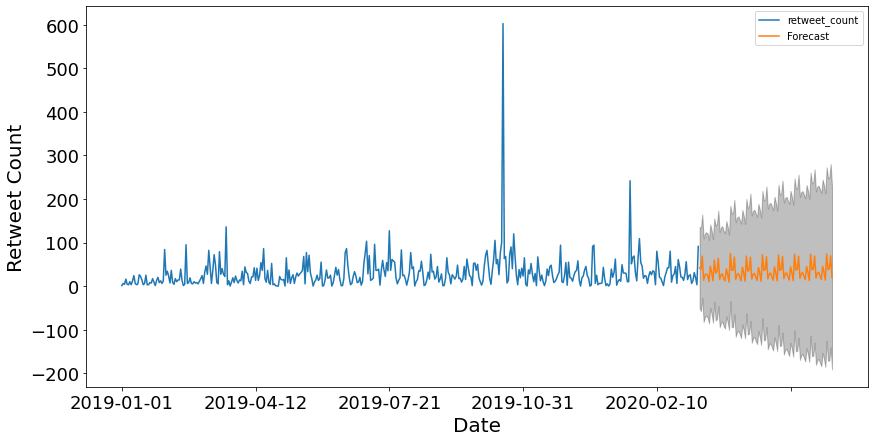

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Pre_Covid_Sentiment_Nigerian_Food_Tweets_Trend.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Retweet Count')

plt.legend()
plt.show()

## **What happened?**

In [ ]:
Covid_Nigerian_Food_Tweets_Trend = Nigerian_Food_Tweets[Nigerian_Food_Tweets['created_at'] <= '2020-03-12' ]
Covid_Nigerian_Food_Tweets_Trend = Covid_Nigerian_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Covid_Sentiment_Nigerian_Food_Tweets_Trend = Covid_Nigerian_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

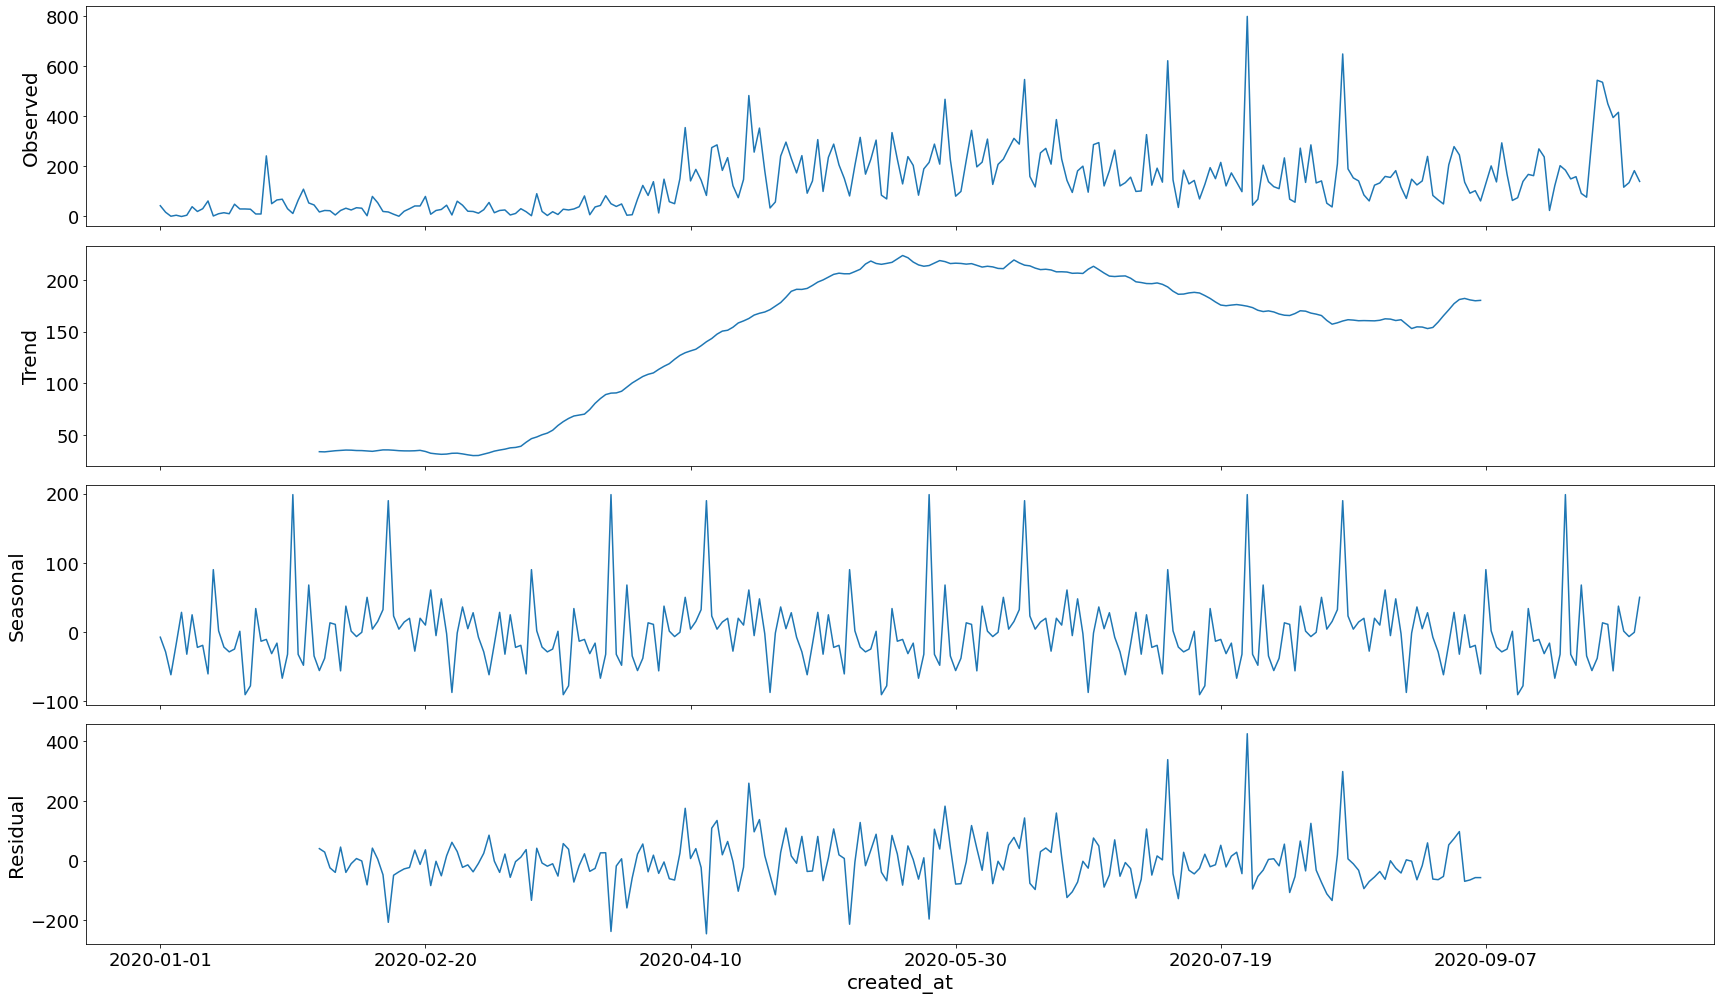

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Covid_Sentiment_Nigerian_Food_Tweets_Trend, model='additive',freq = 60)
fig = decomposition.plot()
plt.show()

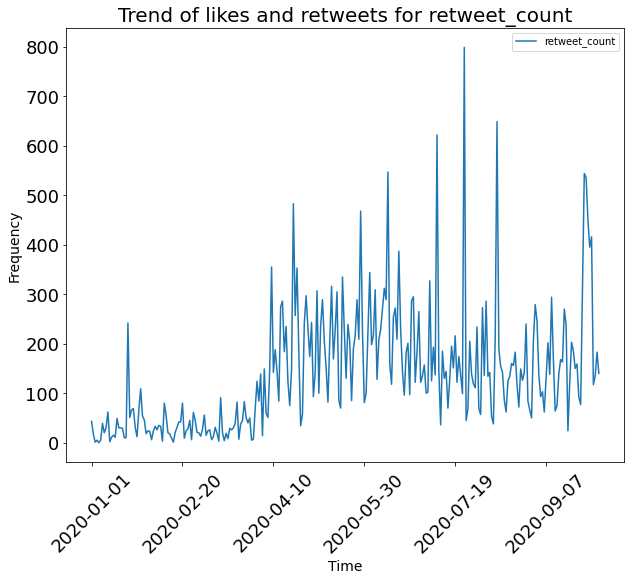

In [ ]:
Auto.Time_Trend(Covid_Sentiment_Nigerian_Food_Tweets_Trend, 'retweet_count')

### **Let us first take note of the trend before Covid in South Africa**

We forecast the trend using Autoregressive Integrated Moving Average

In [ ]:
Pre_Covid_South_African_Food_Tweets_Trend = South_African_Food_Tweets[South_African_Food_Tweets['created_at'] <= '2020-03-12' ]
Pre_Covid_South_African_Food_Tweets_Trend = Pre_Covid_South_African_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Pre_Covid_Sentiment_South_African_Food_Tweets_Trend = Pre_Covid_South_African_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

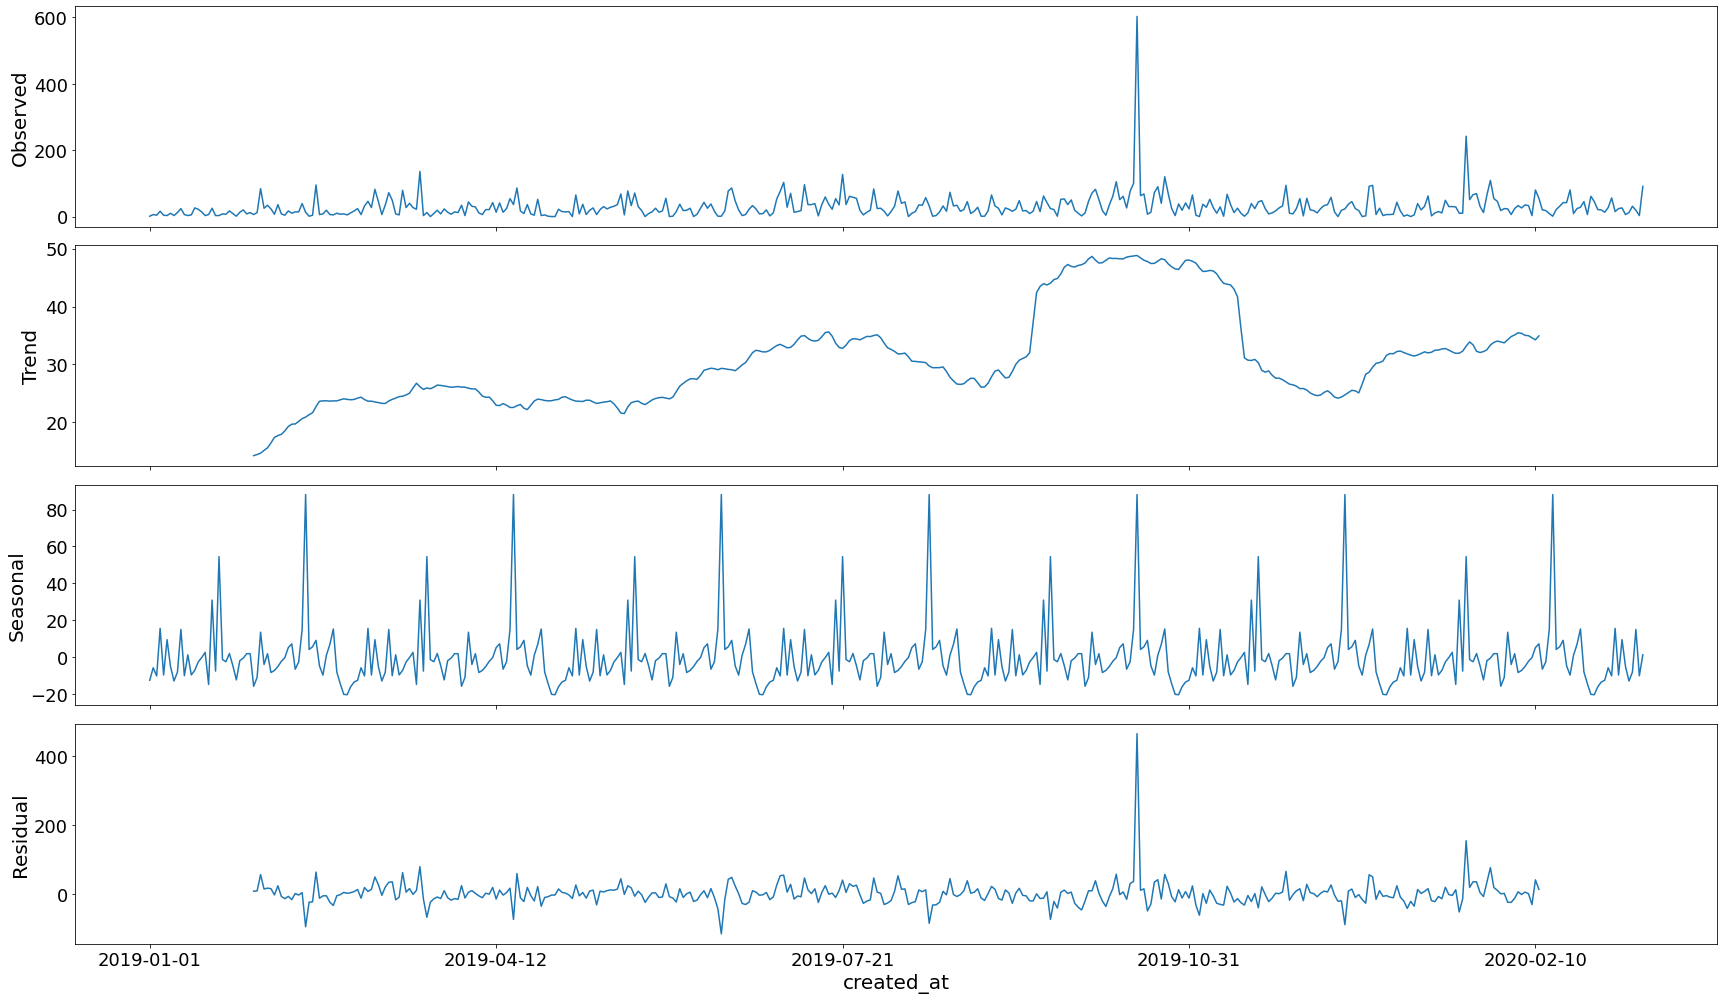

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Pre_Covid_Sentiment_South_African_Food_Tweets_Trend, model='additive', freq = 60)
fig = decomposition.plot()
plt.show()

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_South_African_Food_Tweets_Trend,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4571.645285580174
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4402.13018322828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4521.01348332057
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4176.621644180586
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4389.398892810106
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4294.29191643752
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4333.077464031304
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4178.352614732525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4491.730794823886
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4351.873747316782
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4503.864731558908
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4156.453837769603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4359.541733280456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4275.197228781876
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4317.207494341594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4158.3210331415885
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4566.299118128486
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4451.912289907782
ARIMA(0, 1, 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(Pre_Covid_Sentiment_South_African_Food_Tweets_Trend,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2287      0.038      6.043      0.000       0.155       0.303
ma.L1         -1.0000     12.037     -0.083      0.934     -24.591      22.591
ar.S.L12      -0.4552      0.013    -36.410      0.000      -0.480      -0.431
sigma2      2264.6823   2.73e+04      0.083      0.934   -5.12e+04    5.57e+04


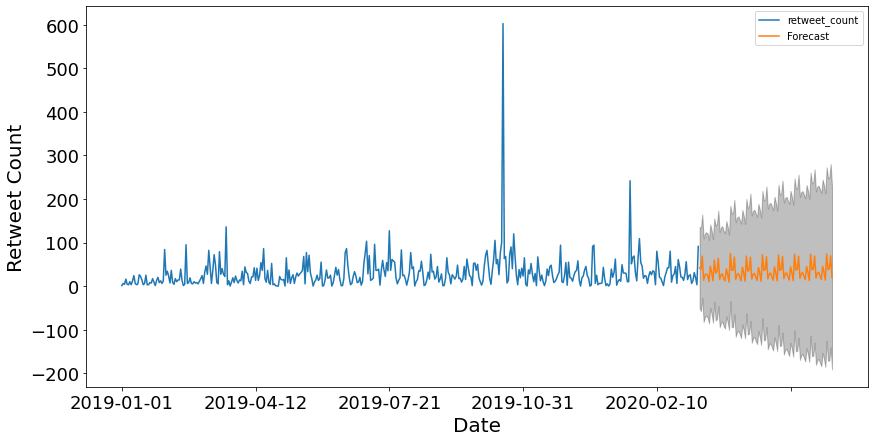

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Pre_Covid_Sentiment_South_African_Food_Tweets_Trend.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Retweet Count')

plt.legend()
plt.show()

## **What happened?**

In [ ]:
Covid_South_African_Food_Tweets_Trend = South_African_Food_Tweets[South_African_Food_Tweets['created_at'] <= '2020-03-12' ]
Covid_South_African_Food_Tweets_Trend = Covid_South_African_Food_Tweets_Trend.set_index('created_at').sort_values(by=['created_at'], ascending=False)

#sentiment
Covid_Sentiment_South_African_Food_Tweets_Trend = Covid_South_African_Food_Tweets_Trend.groupby('created_at')[['retweet_count']].sum()

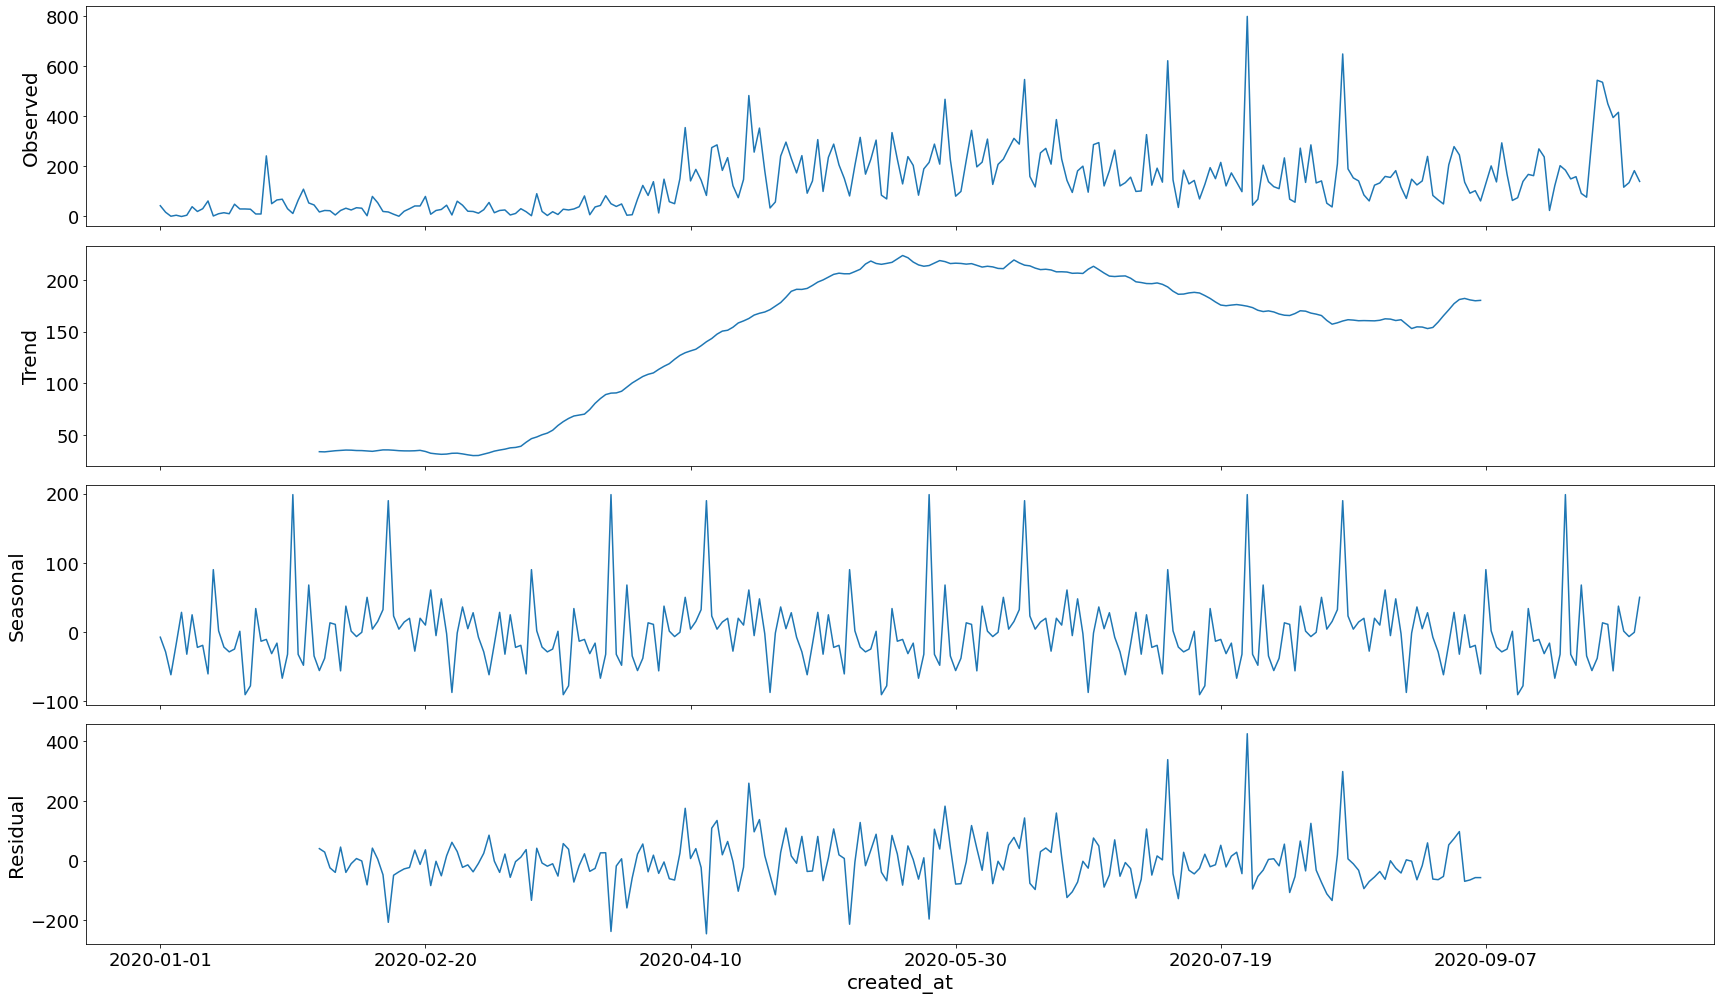

In [ ]:
#Retweets
rcParams['figure.figsize'] = 24, 14

decomposition = sm.tsa.seasonal_decompose(Covid_Sentiment_South_African_Food_Tweets_Trend, model='additive',freq = 60)
fig = decomposition.plot()
plt.show()

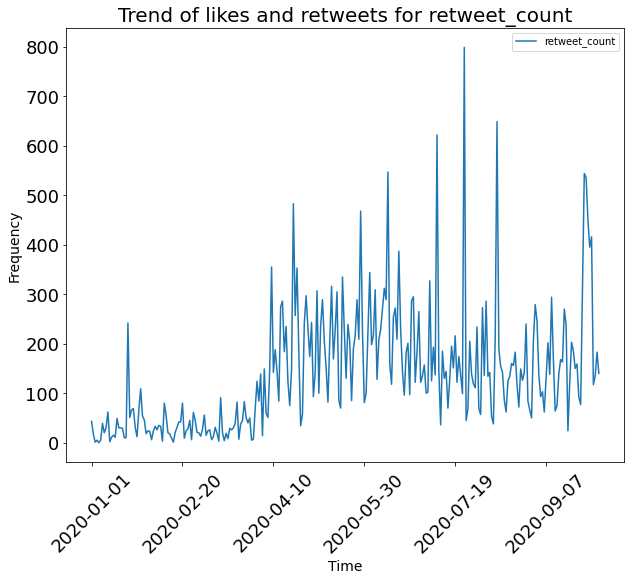

In [ ]:
Auto.Time_Trend(Covid_Sentiment_South_African_Food_Tweets_Trend, 'retweet_count')

## **Sentiment Analysis by User Category**

By User category we have four distinct classes which are:::

In [ ]:
# for kenyans
merged_kenya = food_kenya.merge(Kenyan_Users, on='original_author', how='left')

merged_kenya['created_at'] = pd.to_datetime(merged_kenya['created_at'], errors='coerce')
merged_kenya.shape

(4104288, 13)

In [ ]:
merged_kenya['group'].value_counts()

NGO           2668478
private       1002926
general        293261
government     133330
Name: group, dtype: int64

In [ ]:
merged_kenya_govt = merged_kenya[merged_kenya['group'] == 'government']
merged_kenya_govt.shape

(133330, 13)

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the Government')

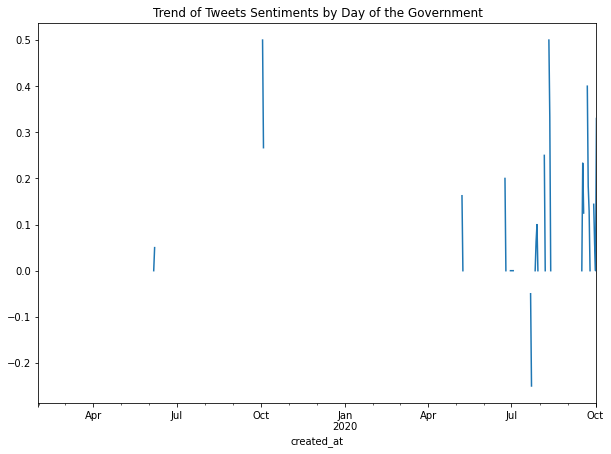

In [ ]:
by_day_sentiment_govt = merged_kenya_govt.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_govt.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the Government')

Looks like the Government Offcials did sebd much tweets until June, Maybe they have not be setup then. Also Note that the content of their tweets was classified as containing negative sentiment in August.

In [ ]:
merged_kenya_gen = merged_kenya[merged_kenya['group'] == 'general']
merged_kenya_gen.shape

(293261, 13)

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the General')

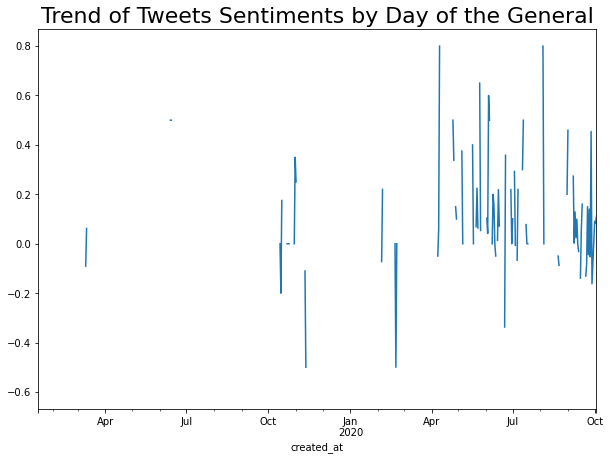

In [ ]:
by_day_sentiment_gen = merged_kenya_gen.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_gen.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the General', size=22)

The General Class of Users had many negative tweets during the outbreak of the Virus. As Govt implement some policies it improved to Neutral and then Positive

In [ ]:
merged_kenya_private = merged_kenya[merged_kenya['group'] == 'private']
merged_kenya_private.shape

(1002926, 13)

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the Private')

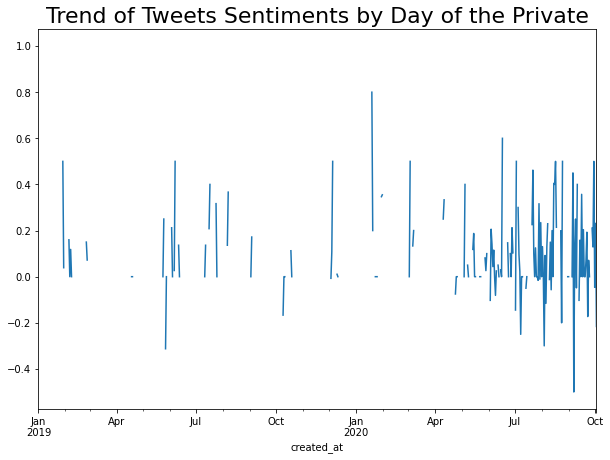

In [ ]:
by_day_sentiment_gen = merged_kenya_private.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_gen.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the Private', size=22)

In [ ]:
merged_kenya_NGO = merged_kenya[merged_kenya['group'] == 'NGO']
merged_kenya_NGO.shape

(2668478, 13)

Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the NGO')

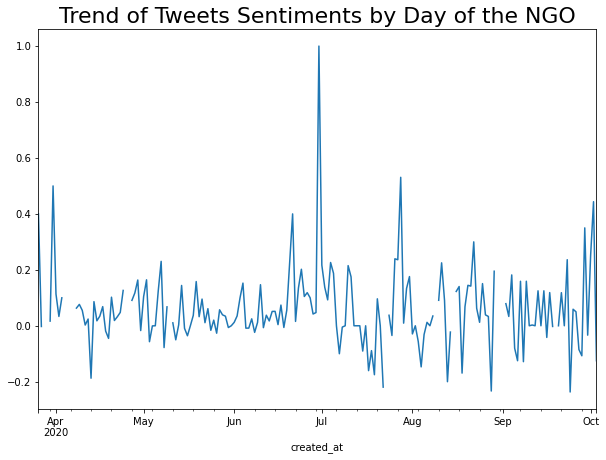

In [ ]:
by_day_sentiment_NGO = merged_kenya_NGO.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_NGO.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the NGO', size=22)

### Now South Africa

In [ ]:
sa_food = pd.read_csv('/content/drive/My Drive/Copy of south food tweets.csv')

sa_merged = sa_food.merge(South_African_Users, on='original_author', how='left')
sa_merged.shape

(24036287, 21)

In [ ]:
sa_merged['created_at'] = pd.to_datetime(sa_merged['created_at'], errors='coerce')
sa_merged['group'].value_counts()

general       14664641
private        7947084
NGO            1167009
government      214981
Name: group, dtype: int64

(214981, 21)


Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the NGO (South Africa)')

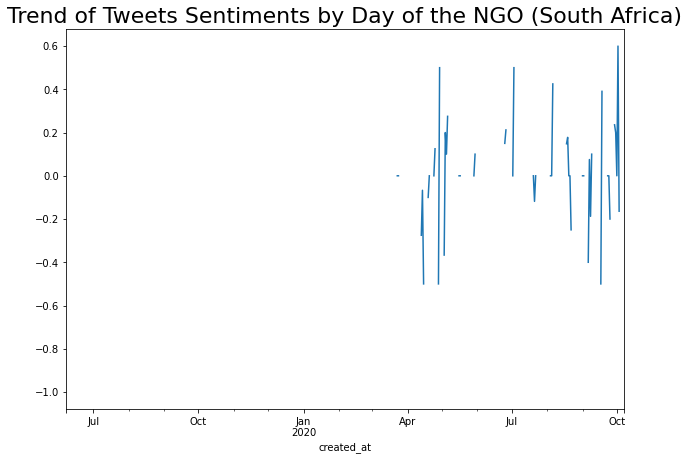

In [ ]:
sa_merged_govt = sa_merged[sa_merged['group'] == 'government']
print(sa_merged_govt.shape)

by_day_sentiment_govt_sa = sa_merged_govt.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_govt_sa.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the NGO (South Africa)', size=22)

(7947084, 21)


Text(0.5, 1.0, 'Trend of Tweets Sentiments by Day of the private Users (South Africa)')

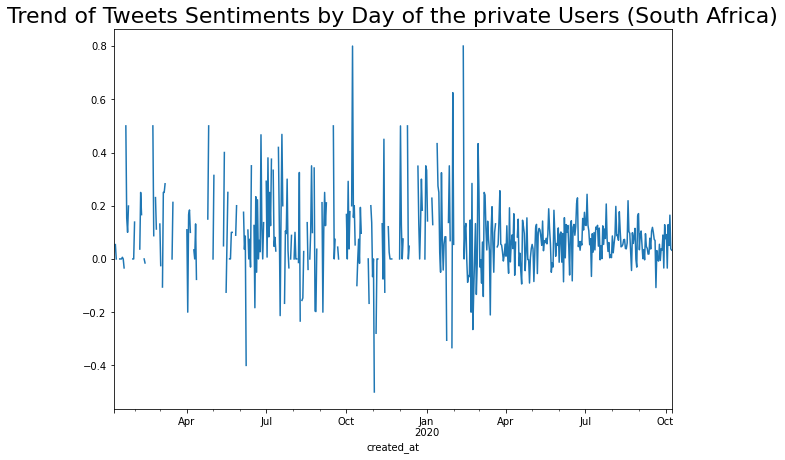

In [ ]:
sa_merged_govt = sa_merged[sa_merged['group'] == 'private']
print(sa_merged_govt.shape)

by_day_sentiment_govt_sa = sa_merged_govt.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

# by_day_sentiment.head()
by_day_sentiment_govt_sa.plot(figsize=(10, 7))
plt.title('Trend of Tweets Sentiments by Day of the private Users (South Africa)', size=22)

In [ ]:
def draw_sentiment_by_day(df, user_category, country):
  sa_merged_govt = df[df['group'] == user_category]
  print(f'{user_category}: is {sa_merged_govt.shape}')

  by_day_sentiment_govt_sa = sa_merged_govt.groupby([pd.Grouper(key='created_at', freq='D')]).mean()['polarity']

  # by_day_sentiment.head()
  by_day_sentiment_govt_sa.plot(figsize=(12, 6))
  plt.title(f'Trend of Tweets Sentiments in {country} for {user_category} Users', size=22)
  plt.show()

In [ ]:
draw_sentiment_by_day(sa_merged, 'general', 'South Africa')

general: is (14664641, 21)


In [ ]:
draw_sentiment_by_day(sa_merged, 'NGO', 'South Africa')


## **Change Point Sentiment Analysis by User Category**
